# Toy Robo Advisor

The objective of this notebook is to recreate what some "robo advisors" do in the market. They only suggest to a potential investor a set of pre-set portfolios according to one, or luckily some, restraints from the user such as its risk aversion or the time horizon for the investment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we define the risk profiles
risk_profiles = ['conservative', 'moderate', 'growth']
rp = None

# we define the posssible time horizons
time_horizons = ['short term', 'medium term', 'long term']
th = None

# we define categories of wealth
client_type = ['retail', 'wealthy']
wealth = None 

In [3]:
# we define a type of attention that te company want to provide to each type of client according to its wealth
def channel(wealth):
    if wealth < 50000:
        return client_type[0]
    else:
        return clent_type[1]

In [35]:
wealth = 10000

In [36]:
channel(wealth)

'retail'

In [37]:
# we define the assets that all porfolios are going to have (a portfolio manager should do this)
tickets = ['SPY', 'QQQ', 'EEM', 'GLD', 'BND', 'VNQ']

In [38]:
# we set the weights of every asset in every portfolio (a portfolio manager should do this, too)
portfolios = {'sc':[0, 0, 0, 0.4, 0.6, 0],
              'sm':[0.1, 0, 0, 0.3, 0.6, 0],
              'sg':[0.1, 0.1, 0, 0.3, 0.5, 0],
              'mc':[0.2, 0.1, 0, 0.1, 0.4, 0.2],
              'mm':[0.2, 0.2, 0, 0.1, 0.3, 0.2],
              'mg':[0.3, 0.2, 0.1, 0.1, 0.2, 0.1],
              'lc':[0.4, 0.2, 0, 0.1, 0.1, 0.2],
              'lm':[0.4, 0.2, 0.1, 0, 0.1, 0.2],
              'lg':[0.4, 0.3, 0.1, 0, 0.1, 0.1],
             }

In [39]:
def toy_robo_advisor(rp, th, wealth):
    recommendation = None
    if th == time_horizons[0]:
        if rp == risk_profiles[0]:
            recommendation = wealth * np.asarray(portfolios['sc'], dtype='float64')
        if rp == risk_profiles[1]:
            recommendation = wealth * np.asarray(portfolios['sm'], dtype='float64')
        if rp == risk_profiles[2]:
            recommendation = wealth * np.asarray(portfolios['sg'], dtype='float64')
    if th == time_horizons[1]:
        if rp == risk_profiles[0]:
            recommendation = wealth * np.asarray(portfolios['mc'], dtype='float64')
        if rp == risk_profiles[1]:
            recommendation = wealth * np.asarray(portfolios['mm'], dtype='float64')
        if rp == risk_profiles[2]:
            recommendation = wealth * np.asarray(portfolios['mg'], dtype='float64')
    if th == time_horizons[2]:
        if rp == risk_profiles[0]:
            recommendation = wealth * np.asarray(portfolios['lc'], dtype='float64')
        if rp == risk_profiles[1]:
            recommendation = wealth * np.asarray(portfolios['lm'], dtype='float64')
        if rp == risk_profiles[2]:
            recommendation = wealth * np.asarray(portfolios['lg'], dtype='float64')
    return recommendation

In [9]:
def print_recommendation(rp, th, wealth):
    recommendation = toy_robo_advisor(rp,th,wealth)
    print('According to your risk aversion and time horizon profile, you should invest in the following portfolio: SPY, QQQ, EEM, GLD, BND, VNQ. We recommend you allocate your wealth in the following way:{}'.format(recommendation))

In [10]:
toy_robo_advisor(rp='conservative', th='medium term', wealth=10000)

array([20000., 10000.,     0., 10000., 40000., 20000.])

In [40]:
print_recommendation(rp='conservative', th='medium term', wealth=10000)

According to your risk aversion and time horizon profile, you should invest in the following portfolio: SPY, QQQ, EEM, GLD, BND, VNQ. We recommend you allocate your wealth in the following way:[2000. 1000.    0. 1000. 4000. 2000.]


In [105]:
def graph_recommendation(rp, th, wealth):
    labels = tickets
    pct_weights =  np.divide(toy_robo_advisor(rp, th, wealth), wealth)
    w = list(range(len(tickets)))
    for i in w:
        if pct_weights[i:i] == 0:
            labels.drop(labels[i], inplace=True)
    colors = ['green', 'lightskyblue', 'lightcoral', 'gold', 'grey', 'red']

    # Plot
    plt.pie(pct_weights, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    

    plt.axis('equal')
    plt.show()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


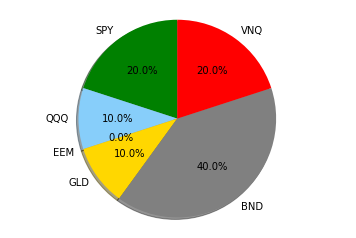

In [106]:
graph_recommendation(rp='conservative', th='medium term', wealth=10000)